# <a href="https://girafe.ai/" target="_blank" rel="noopener noreferrer"><img src="https://raw.githubusercontent.com/girafe-ai/ml-course/7096a5df4cada5ee651be1e3215c2f7fb8a7e0bf/logo_margin.svg" alt="girafe-ai logo" width="150px" align="left"></a> [ml-basic course](https://github.com/girafe-ai/ml-course) <a class="tocSkip">

# Lab assignment №1, part 2

This lab assignment consists of several parts.

In this part you will work with SVM algorithm and it's kernels.

Several comments:
* Don't hesitate to ask questions in a chat, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.gridspec as gridspec
import itertools
from sklearn.base import BaseEstimator
from matplotlib.axes import Axes
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

Let's generate our dataset and take a look on it.

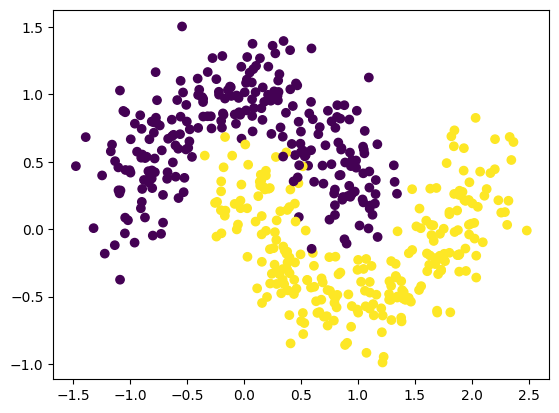

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, random_state=42, test_size=0.2)

## 1.1 Pure models

First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

* train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded)
* plot their decision regions
* calculate preffered classification metrics.
* describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and plot with matplotlib yourself or use [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [4]:
lr = LogisticRegression(solver='saga', tol=1e-3, max_iter=500, random_state=42)  # add some params
svm = SVC(kernel="linear", random_state=42)  # here too

In [5]:
def plot_decision(X, y, estimator, ax) -> None:
  clf.fit(X, y)
  ax = plot_decision_regions(X, y, clf=estimator, legend=2)

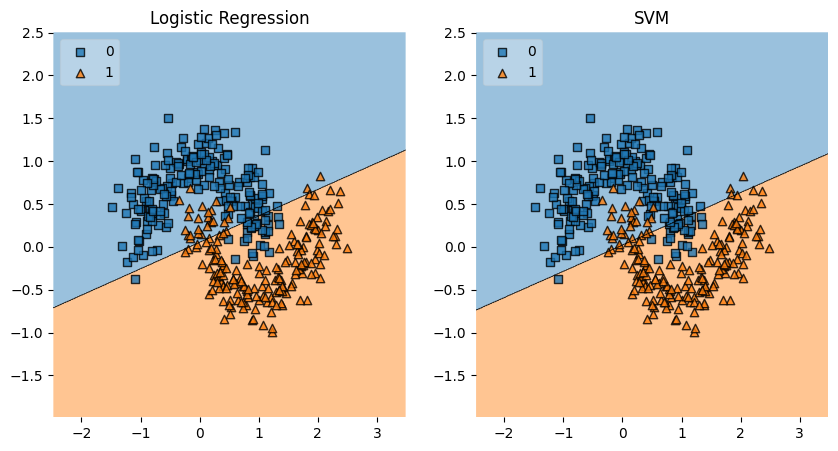

In [6]:
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(10, 5))

for clf, lab, grd in zip([lr, svm],
                         ['Logistic Regression', 'SVM'],
                         itertools.product([0], [0, 1])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision(X_train, y_train, clf, ax)
    plt.title(lab)
plt.show()

In [7]:
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)

f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f'Logistic Regression, f1: {f1_lr:.3f}')
print(f'SVM, f1: {f1_svm:.3f}')

Logistic Regression, f1: 0.861
SVM, f1: 0.851


Посмотрев на разделение, можно сказать, что линейные классификаторы плохо работают на данных, которые нельзя линейно разделить.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel
* estimate optimal params (with a few manual trials)
* plot decision regions
* calculate metrics you've chosen eariler

In [8]:
svm_poly = SVC(kernel="poly", random_state=42, degree=3)
svm_rbf = SVC(kernel="rbf", random_state=42)
svm_sigmoid = SVC(kernel="sigmoid", random_state=42)

poly, f1: 0.910
rbf, f1: 0.960
sigmoid, f1: 0.661


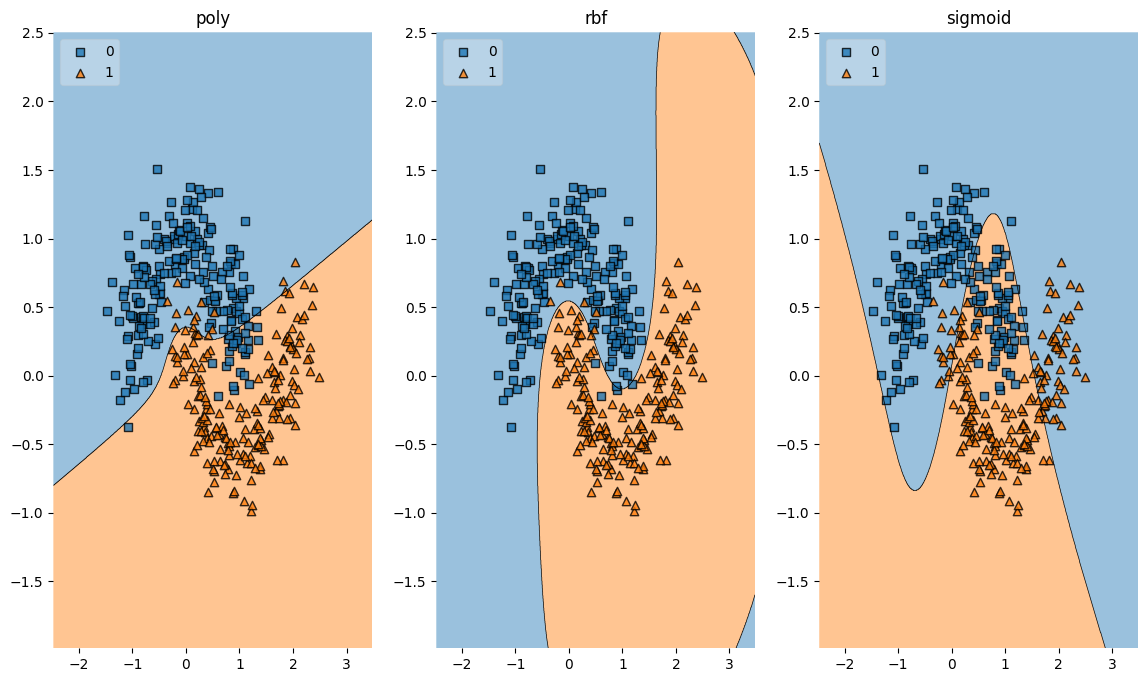

In [9]:
gs = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(14, 8))

for clf, lab, grd in zip([svm_poly, svm_rbf, svm_sigmoid],
                         ['poly', 'rbf', 'sigmoid'],
                         itertools.product([0], [0, 1, 2])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision(X_train, y_train, clf, ax)
    plt.title(lab)

    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{lab}, f1: {f1:.3f}')
plt.show()

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

* Значение метрики f1 увеличилось для poly и rbf, для sigmoid уменьшилось
* Теперь это не просто прямая
* Для poly я выбрал degree=3, тк остальные значения degree давали меньшее значение метрики f1

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [10]:
from sklearn.preprocessing import PolynomialFeatures

lr = LogisticRegression(solver='saga', tol=1e-3, max_iter=1000, random_state=42)
degrees = range(2, 8)

In [11]:
for d, grd in zip(degrees, itertools.product([0, 1], repeat=3)):
    poly = PolynomialFeatures(d)
    X_poly_train = poly.fit_transform(X_train, y_train)
    X_poly_test = poly.transform(X_test)

    lr.fit(X_poly_train, y_train)

    y_pred = lr.predict(X_poly_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'Degree {d}, f1: {f1:.3f}')

Degree 2, f1: 0.861
Degree 3, f1: 0.960
Degree 4, f1: 0.950
Degree 5, f1: 0.920
Degree 6, f1: 0.850
Degree 7, f1: 0.767


Можно сказать что при $degree=3$ значение метрики f1 совпадает со значением метрики, которое получилось при SVM c ядром $kernel = rbf$

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

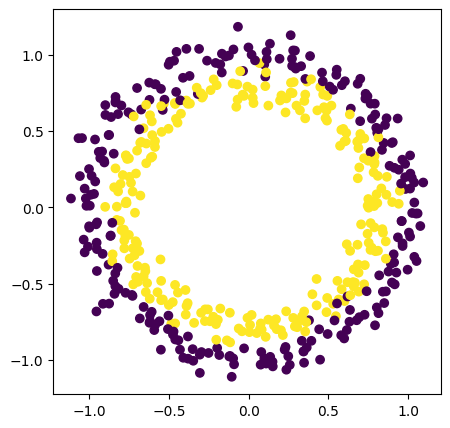

In [12]:
from sklearn.datasets import make_circles


circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

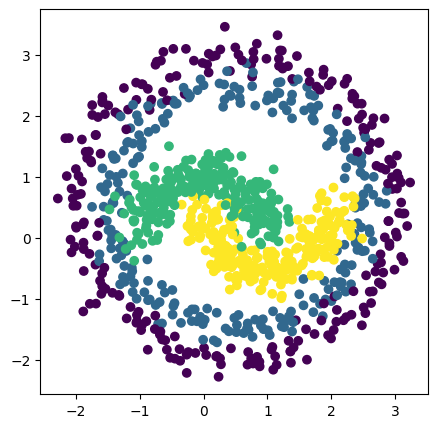

In [13]:
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))  # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

On that harder problem compare SVM and Gradient boosting.

Tune GB (manually ok), then SVM with appropriate kernel of your choice.

Again plot decision regions, calculate metrics.

Justify the results in a few phrases.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, random_state=42, test_size=0.2)

In [52]:
gbc = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=4)
svm_rbf = SVC(kernel="rbf", random_state=42)

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


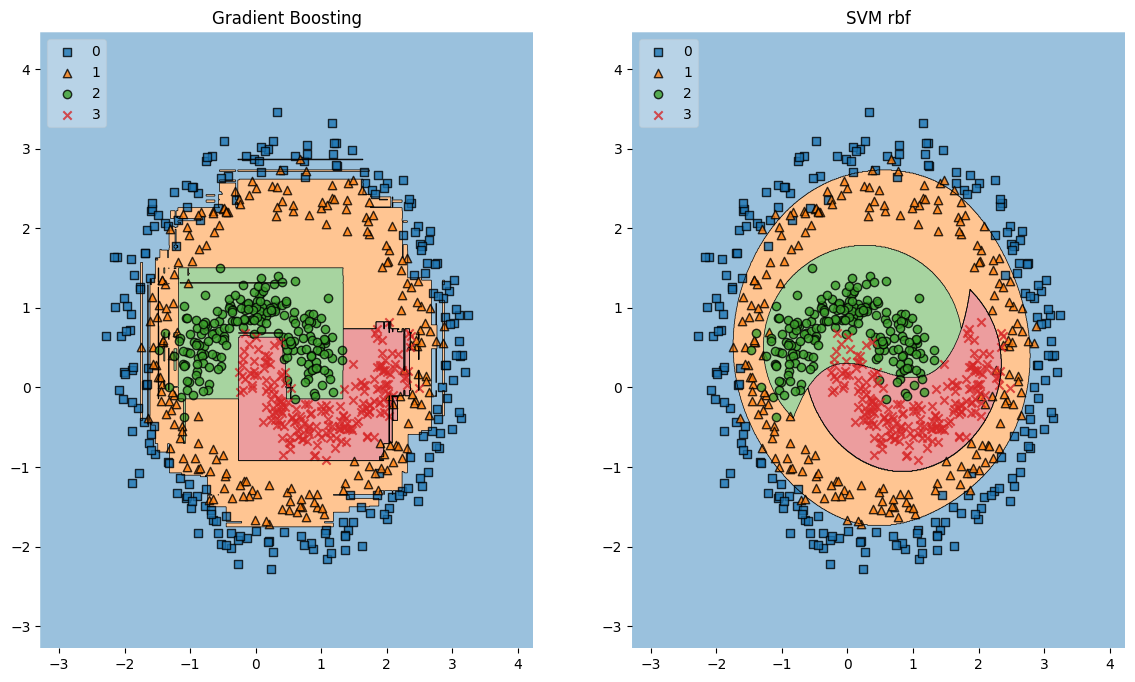

In [53]:
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(14, 8))

for clf, lab, grd in zip([gbc, svm_rbf],
                         ['Gradient Boosting', 'SVM rbf'],
                         itertools.product([0], [0, 1])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision(X_train, y_train, clf, ax)
    plt.title(lab)
plt.show()

In [54]:
y_pred_svm = svm_rbf.predict(X_test)
y_pred_gbc = gbc.predict(X_test)

f1_svm = f1_score(y_test, y_pred_svm , average='weighted')
f1_gbc = f1_score(y_test, y_pred_gbc , average='weighted')

print(f'Gradient Boosting, f1: {f1_gbc:.3f}')
print(f'SVM rbf, f1: {f1_svm :.3f}')

Gradient Boosting, f1: 0.910
SVM rbf, f1: 0.910


Видим, что оба классификатора показывают хорошие значения метрики f1.